In [3]:
# Provided by Somayeh Komeylian: PhD Student at UCSD & SDSU #
# Computer Vision #
# Making Mask/s for Portion/s of Image/s #

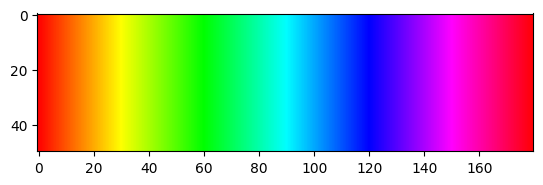

In [1]:
# The provided code creates and displays a rainbow-colored image using Python's NumPy, OpenCV (cv2), and Matplotlib (plt) libraries.
# Resulting image: The output is a 50-pixel-high image showing a complete spectrum of colors, commonly referred to as a rainbow. 
# The image will have a size of 50 pixels in height and 180 pixels in width.

import cv2
import matplotlib.pyplot as plt
import numpy as np

hue = np.linspace(0, 179, dtype = 'uint8', num = 180)
hue = np.array([hue]*50)
one = np.ones_like(hue)*255
img = cv2.merge([hue, one, one])

img2 = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
plt.imshow(img2[..., ::-1])

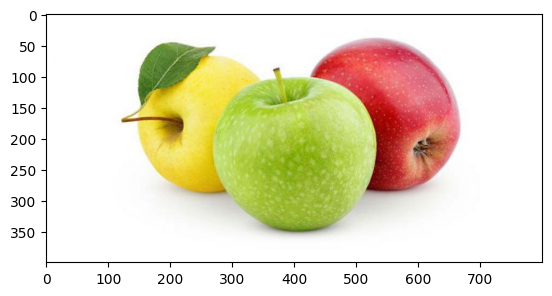

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('h.jpg')
plt.imshow(img[...,::-1])

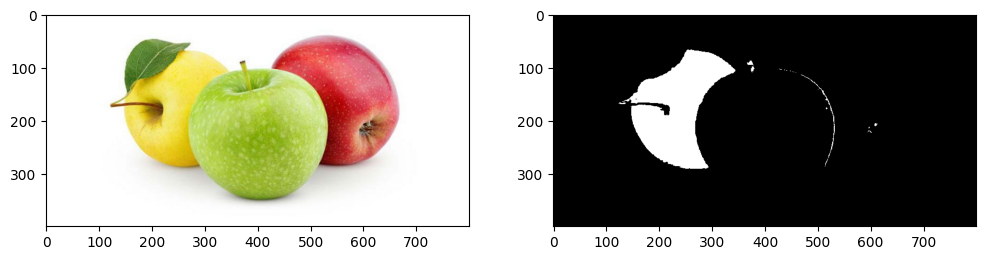

In [5]:
###### We want to cut the *YELLOW* apple from the whole of the image: Step 1: Making mask:######  
### We should apply the two following steps:
### Step 1: We create a mask for the yellow apple
### Step 2: We add the mask on the original image 
### In the second step, we should make "and" between the mask color and the original image:

img = cv2.imread('h.jpg')

low = np.array([20, 50, 50])
# Hue (H): 20: This sets the minimum hue to a value that corresponds to the orange color range.
# Saturation (S): 50: This sets the minimum saturation, including moderately desaturated (dull) oranges.
# Value (V): 50: This sets the minimum brightness, ignoring very dark (almost black) orange shades. 

upper = np.array([30, 255, 255])
# Hue (H): 30: This sets the minimum hue to a value that corresponds to the orange color range.
# Saturation (S): 255: This sets the minimum saturation, including moderately desaturated (dull) oranges.
# Value (V): 255: This sets the minimum brightness, ignoring very dark (almost black) orange shades. 

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(hsv, low, upper)

plt.figure(figsize=[12, 6])
plt.subplot(121);plt.imshow(img[...,::-1])
plt.subplot(122);plt.imshow(mask, cmap = 'gray')



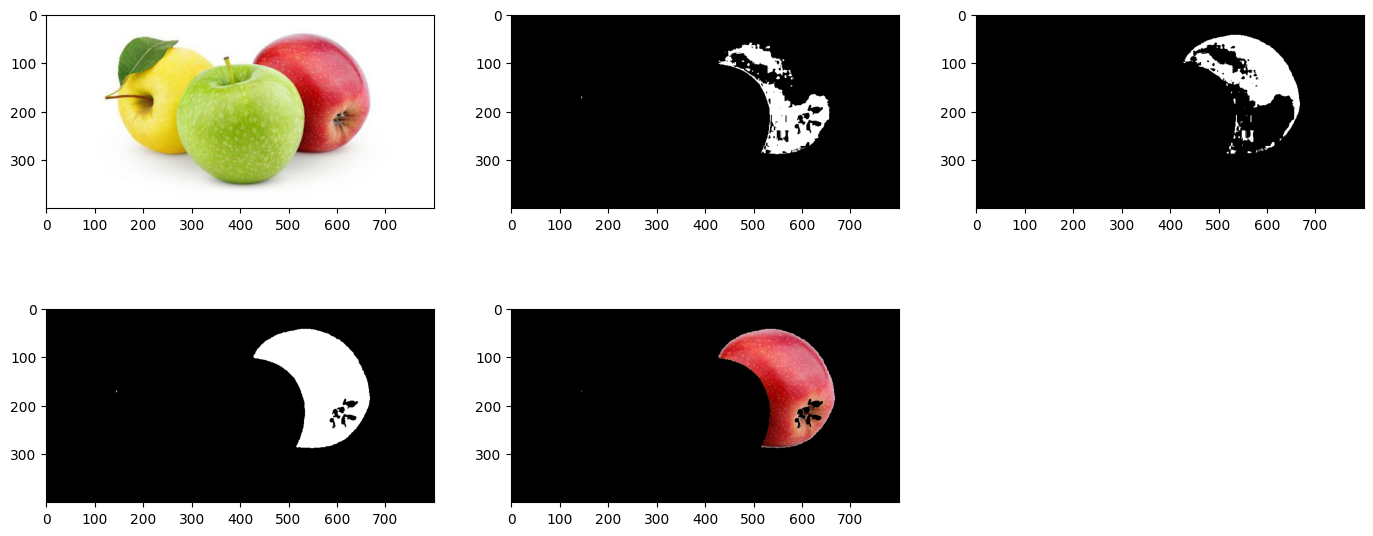

In [6]:
###### We want to cut the *RED* apple from the whole of the image: Step 1: Making mask:######  
### We should apply the two following steps:
### Step 1: We create a mask for the yellow apple:
######### For the RED apple, we have two ranges, thereby we have to make two masks for the RED apple. 
######### Then, we should marge two masks. 
######### Since masks are one channel and the original image is three channels, we should make the result of the two marging masks three channels.   
### Step 2: We add the mask on the original image 
### In the second step, we should make "and" between the mask color and the original image:

img = cv2.imread('h.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

low1 = np.array([0, 50, 50])
upper1 = np.array([10, 255, 255])

# low1 = np.array([0, 50, 50]):
# Hue (H): 0: This sets the minimum hue to 0, which is the starting point for the color red on the HSV color wheel.
# Saturation (S): 50: This sets a minimum saturation level, filtering out grayish or very dull red shades.
# Value (V): 50: This sets a minimum brightness level, filtering out very dark (almost black) red shades. 

# upper1 = np.array([10, 255, 255]): 
# Hue (H): 10: This sets the maximum hue to 10, covering a portion of the red spectrum. In HSV, red occupies both the low and high end of the hue range (e.g., 0-10 and 170-180 in OpenCV).
# Saturation (S): 255: This includes all levels of saturation, allowing for both vivid and moderately desaturated red shades.
# Value (V): 255: This includes all levels of brightness, from moderately bright to very bright red shades. 


low2 = np.array([165, 50, 50])
upper2 = np.array([179, 255, 255]) 

# low2 = np.array([165, 50, 50]): 
# Hue (H): 165: This sets the minimum hue value for the upper part of the red spectrum on the HSV color wheel. Since the color wheel wraps around, red appears at both the very low (0–10) and very high (160–180) ends of the hue range.
# Saturation (S): 50: This sets the minimum saturation, allowing for moderately vivid to pure red shades.
# Value (V): 50: This sets the minimum brightness, filtering out very dark reds. 

# upper2 = np.array([179, 255, 255]):
# Hue (H): 179: This sets the maximum hue, covering the top end of the red color spectrum.
# Saturation (S): 255: This includes all levels of saturation, up to the most vibrant reds.
# Value (V): 255: This includes all levels of brightness, up to the brightest reds.

mask = cv2.inRange(hsv, low1, upper1)
mask2 = cv2.inRange(hsv, low2, upper2)

mask3 = mask + mask2

mask_cha = cv2.merge([mask3]*3)
result =  cv2.bitwise_and(img, mask_cha)

plt.figure(figsize=[17, 7])
plt.subplot(231);plt.imshow(img[...,::-1])
plt.subplot(232);plt.imshow(mask, cmap = 'gray')
plt.subplot(233);plt.imshow(mask2, cmap = 'gray')
plt.subplot(234);plt.imshow(mask3, cmap = 'gray')
plt.subplot(235);plt.imshow(result[...,::-1])
